# Lecture-03 Gradient Descent and Dymanic Programming

###### In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

## Part I Review the online programming. 

# The use of defaultdict

In [ ]:
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
price = defaultdict(int)  # create a dictionary and if the index is not exsist, return 0.

for i, p in enumerate(original_price):
    price[i+1] = p
print(price[9])
print(price[20])

# The use of function as a parameter

In [ ]:
def add_ten(num):
    return num + 10

def multiply_ten(num):
    return num * 10

def example(f, arg):
    return f(arg)

operations = [add_ten, multiply_ten]
for f in operations:
    print(example(f,100))

# Create a decorator function to calculate how many times a function been called 

In [ ]:
from collections import defaultdict

called_time = defaultdict(int)

# calculate the time the function are used
def get_call_times(f):
    result = f()
    print(f"function: {f.__name__} called once!")
    called_time[f.__name__] += 1
    return result

def function_1(): print("I am function 1!")

get_call_times(function_1)
print("---------------")
print(called_time)

In [ ]:
from functools import wraps
from collections import defaultdict


called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha, I am warp"""
        print("I can count!")
        result = f(n)
        called_time_with_arg[f.__name__, n] += 1
        return result
    return wrap

def add_ten(n): return n + 10
add_ten = get_call_time(add_ten)
print(add_ten(10))
print("---------------")
print(called_time_with_arg)


print("---------------")
@get_call_time
def add_twenty(n):
    return n + 20

print(add_twenty(100))
print("---------------")
print(called_time_with_arg)

# 如何理解functools.wraps 的作用？
装饰器（decorator）是干嘛的？对于受到封装的原函数来说，装饰器能够在那个函数执行前或者执行后分别运行一些代码，使得可以再装饰器里面访问并修改原函数的参数以及返回值，以实现约束定义、调试程序、注册函数等目标。装饰器一般返回一个包装器（wrapper），而functools.wraps就是装饰包装器的装饰器。

先来看一个不使用functools.wraps的装饰器例子:

In [ ]:
def tracer(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print('%s(%r,%r)->%r'%(func.__name__,args,kwargs,result))
        return result
    return wrapper

@tracer
def fibonacci(n):
    if n in (0,1):
        return n
    return (fibonacci(n-1)+fibonacci(n-2))


fibonacci(3)
print(fibonacci)
print('help:')
help(fibonacci)

可以看到，装饰器完全可以正常工作。。。

但是，函数的名字变成装饰器中的包装器了！！！help内置函数也失效了

也就是说，原函数的属性失效了

如果想要保留原函数的属性，就可以用到functools.wraps了

In [ ]:
from functools import wraps
def tracer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print('%s(%r,%r)->%r'%(func.__name__,args,kwargs,result))
        return result
    return wrapper

@tracer
def fibonacci(n):
    if n in (0,1):
        return n
    return (fibonacci(n-1)+fibonacci(n-2))


fibonacci(3)
print(fibonacci)
print('help:')
help(fibonacci)

# Get the max splitting by enumerate

In [ ]:
from functools import wraps
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
  
# create a special dictionary in which if the index is not exsist, return 0.
price = defaultdict(int)

# fill the dictionary "price" with orginal_price
for i, p in enumerate(original_price):
    price[i+1] = p
#print(price)

called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha, I am warp"""
        #print("I can count!")
        result = f(n)
        called_time_with_arg[f.__name__, n] += 1
        return result
    return wrap


def memo(f): 
    already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in already_computed: 
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap


solution = {}
@get_call_time
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

print(r(34))
print(parse_solution(34))
print("--------------")
print(called_time_with_arg)
print("--------------")
print(solution)

# Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

## loss1

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})^2} $$


$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$


$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$


$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

When time is : 0, get best_k: -46.672979095470104 best_b: -95.46494266537997, and the loss is: 170760.74382563267
When time is : 500, get best_k: 15.377275940237327 best_b: -74.58769833344363, and the loss is: 63.232115819136276
When time is : 1000, get best_k: 14.035714102124222 best_b: -66.05386516392326, and the loss is: 55.7353651886454
When time is : 1500, get best_k: 12.980963463971898 best_b: -59.34447188385128, and the loss is: 51.101416007822316
When time is : 2000, get best_k: 12.151706938422963 best_b: -54.06947326453747, and the loss is: 48.23704368588412
When time is : 2500, get best_k: 11.499736358561425 best_b: -49.92221146719887, and the loss is: 46.46649582734494
When time is : 3000, get best_k: 10.987149934567206 best_b: -46.66158873401189, and the loss is: 45.372071162168574
When time is : 3500, get best_k: 10.584148863385481 best_b: -44.09805136219758, and the loss is: 44.69557696746511
When time is : 4000, get best_k: 10.267304999070692 best_b: -42.08257015064823, 

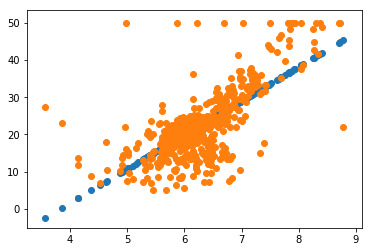

In [45]:
from sklearn.datasets import load_boston
#import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

data = load_boston()
trying_times = 10000
X, y = data['data'], data['target']
X_rm =X[:,5]
k_best, b_best = None, None
loss_min = float('inf') 
k_current = random.random() * 200 - 100
b_current = random.random() * 200 - 100
learning_rate = 0.02
update_time = 0


def price(rm, k, b):
    return rm*k + b

def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(y)

def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) 
    return -2 / n * gradient


for i in range(trying_times):
    price_by_k_and_b = [price(r, k_current, b_current) for r in X_rm]
    loss_current = loss(y, price_by_k_and_b)
    if loss_current < loss_min: # performance became better
        k_best, b_best, loss_min = k_current, b_current, loss_current
    if i % 500 == 0: 
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, k_best, b_best, loss_min))
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    k_current +=  (-1 * k_gradient) * learning_rate
    b_current +=  (-1 * b_gradient) * learning_rate

    
plt.scatter(X_rm, [price(rm, k_best, b_best) for rm in X_rm])
plt.scatter(X_rm, y)

## loss2

$$loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$$



$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$


$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum(y_i - \hat{y_i})x_i/|y_i - (kx_i + b_i)|$$


$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(y_i - \hat{y_i})/|y_i - (kx_i + b_i)|$$

When time is : 0, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 1000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 2000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 3000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 4000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 5000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 6000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 7000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss is: 351.1030910245974
When time is : 8000, get best_k: -66.45774897472832 best_b: 89.09236981208349, and the loss

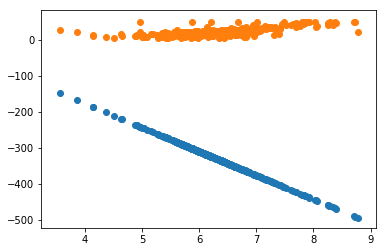

When time is : 0, get best_k: 2.454098601373971 best_b: -21.44145458412767, and the loss is: 28.551148448091563
When time is : 1000, get best_k: 7.0931875341802035 best_b: -21.990861698753413, and the loss is: 4.654611787943968
When time is : 2000, get best_k: 7.295300577658539 best_b: -23.18532810191633, and the loss is: 4.6252162292189825
When time is : 3000, get best_k: 7.482262435366012 best_b: -24.303114663181468, and the loss is: 4.5995269723209065
When time is : 4000, get best_k: 7.643876664615211 best_b: -25.33196841812121, and the loss is: 4.577825844728113
When time is : 5000, get best_k: 7.8053679689629325 best_b: -26.311810315353927, and the loss is: 4.55809854466156
When time is : 6000, get best_k: 7.953176269358076 best_b: -27.251336007052238, and the loss is: 4.53998038551838
When time is : 7000, get best_k: 8.079547810859863 best_b: -28.104102805469775, and the loss is: 4.5251167655062
When time is : 8000, get best_k: 8.201013621136788 best_b: -28.888490157247237, and t

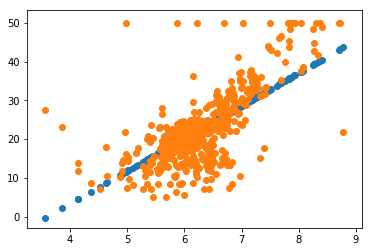

When time is : 0, get best_k: 81.63936382704665 best_b: 62.106644230846854, and the loss is: 552.6473911757167
When time is : 1000, get best_k: -3.474038939752189 best_b: 42.763561226891426, and the loss is: 7.858999612103659
When time is : 2000, get best_k: -2.4342381492384577 best_b: 36.397158064834116, and the loss is: 7.442754257982677
When time is : 3000, get best_k: -1.434525105760224 best_b: 30.337079013450992, and the loss is: 7.065474504812641
When time is : 4000, get best_k: -0.45053340615549836 best_b: 24.405063203173892, and the loss is: 6.703880146957051
When time is : 5000, get best_k: 0.4526709416705895 best_b: 18.816920910683805, and the loss is: 6.383241281385898
When time is : 6000, get best_k: 1.3090073053069455 best_b: 13.48806715574299, and the loss is: 6.091883997561896
When time is : 7000, get best_k: 2.149990704516425 best_b: 8.334312215031364, and the loss is: 5.819129958077621
When time is : 8000, get best_k: 2.9289254871251327 best_b: 3.5540750608810807, and 

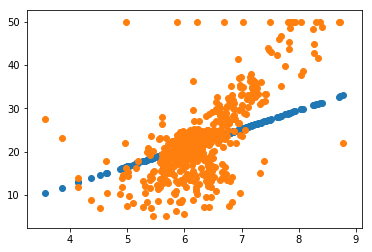

When time is : 0, get best_k: -16.505430608012972 best_b: -15.583506935429853, and the loss is: 141.84691003670747
When time is : 1000, get best_k: 6.203808127164924 best_b: -16.54160970222838, and the loss is: 4.801932549780112
When time is : 2000, get best_k: 6.844587376176871 best_b: -20.526985196299922, and the loss is: 4.693048548073295
When time is : 3000, get best_k: 7.454561486848755 best_b: -24.141807330687236, and the loss is: 4.603183456900981
When time is : 4000, get best_k: 7.936650814911858 best_b: -27.121056342544755, and the loss is: 4.542341754255782
When time is : 5000, get best_k: 8.297064352461314 best_b: -29.51749903029139, and the loss is: 4.5029688713191405
When time is : 6000, get best_k: 8.609420973014776 best_b: -31.513744089580065, and the loss is: 4.475698739074059
When time is : 7000, get best_k: 8.883639945346781 best_b: -33.14951484056857, and the loss is: 4.457318698299288
When time is : 8000, get best_k: 9.053059905820875 best_b: -34.247538555982715, an

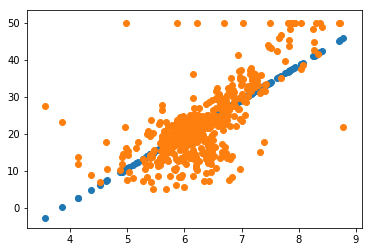

When time is : 0, get best_k: -6.535869459881027 best_b: -35.43901894863559, and the loss is: 99.04737523155676
When time is : 1000, get best_k: 9.08604990770806 best_b: -34.44139049013583, and the loss is: 4.447723238449783
When time is : 2000, get best_k: 9.278583109289423 best_b: -35.586845035588716, and the loss is: 4.441164549726863
When time is : 3000, get best_k: 9.37417401838055 best_b: -36.27222052966005, and the loss is: 4.438396451130934
When time is : 4000, get best_k: 9.41886057964549 best_b: -36.514908276695216, and the loss is: 4.437676962169229
When time is : 5000, get best_k: 9.49159061917176 best_b: -37.02241815811886, and the loss is: 4.437398845702259
When time is : 6000, get best_k: 9.540134097432755 best_b: -37.19237863242705, and the loss is: 4.437182576607679
When time is : 7000, get best_k: 9.571410777275055 best_b: -37.421627644284385, and the loss is: 4.43661527099067
When time is : 8000, get best_k: 9.593987061860245 best_b: -37.557596023730795, and the loss

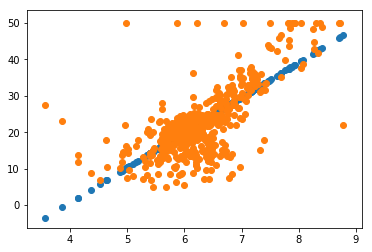

When time is : 0, get best_k: 25.65391179686965 best_b: -72.89190171053252, and the loss is: 65.8364728061556
When time is : 1000, get best_k: 13.838256658529856 best_b: -64.24170408207335, and the loss is: 4.927279974666347
When time is : 2000, get best_k: 12.545946875921322 best_b: -56.38399657219155, and the loss is: 4.673256501634483
When time is : 3000, get best_k: 11.717614366040053 best_b: -50.977870089978, and the loss is: 4.550518470647622
When time is : 4000, get best_k: 11.123474049834488 best_b: -47.03419420065067, and the loss is: 4.487106839630846
When time is : 5000, get best_k: 10.735792231652697 best_b: -44.5025736472905, and the loss is: 4.465228160352512
When time is : 6000, get best_k: 10.727144010308821 best_b: -44.461071671005904, and the loss is: 4.464221665797056
When time is : 7000, get best_k: 10.727144010308821 best_b: -44.461071671005904, and the loss is: 4.464221665797056
When time is : 8000, get best_k: 10.727144010308821 best_b: -44.461071671005904, and t

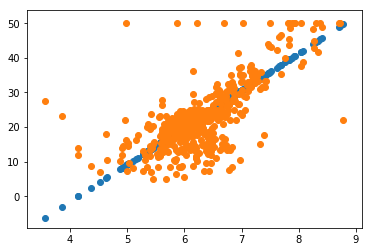

When time is : 0, get best_k: -55.35710716018727 best_b: 90.59034345920043, and the loss is: 279.84164210814066
When time is : 1000, get best_k: -9.051221389436652 best_b: 77.07018535643219, and the loss is: 10.2044919670044
When time is : 2000, get best_k: -5.78219490722353 best_b: 56.907339506628524, and the loss is: 8.813604882118375
When time is : 3000, get best_k: -2.5874415475398385 best_b: 37.34567942757543, and the loss is: 7.503678545348956
When time is : 4000, get best_k: 0.32657110068145456 best_b: 19.63382172006575, and the loss is: 6.428860212014241
When time is : 5000, get best_k: 2.9797100334878786 best_b: 4.442912629156604, and the loss is: 5.747945182441295
When time is : 6000, get best_k: 3.8681873062150207 best_b: -3.8788265012781658, and the loss is: 5.532985196132499
When time is : 7000, get best_k: 5.867057661946259 best_b: -16.672107133689163, and the loss is: 5.306662275860031
When time is : 8000, get best_k: 6.175618926768419 best_b: -18.553925315507414, and th

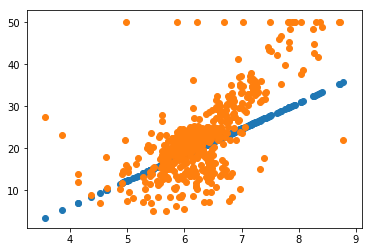

When time is : 0, get best_k: -72.41056922649236 best_b: -77.10599276959871, and the loss is: 554.7127524622397
When time is : 1000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 2000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 3000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 4000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 5000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 6000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 7000, get best_k: 13.304836801175785 best_b: -63.465676564065326, and the loss is: 5.407895870152093
When time is : 8000, get best_k: 13.304836801175785 best_b: -63.465676564065

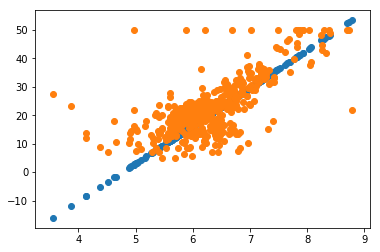

When time is : 0, get best_k: -13.067304343511736 best_b: 47.43868870937456, and the loss is: 57.21734784196122
When time is : 1000, get best_k: -0.4488071103102115 best_b: 24.083747997912113, and the loss is: 6.692110710592545
When time is : 2000, get best_k: 0.8607509924567205 best_b: 17.08453851174614, and the loss is: 6.330302290940366
When time is : 3000, get best_k: 0.8607509924567205 best_b: 17.08453851174614, and the loss is: 6.330302290940366
When time is : 4000, get best_k: 0.8607509924567205 best_b: 17.08453851174614, and the loss is: 6.330302290940366
When time is : 5000, get best_k: 0.8607509924567205 best_b: 17.08453851174614, and the loss is: 6.330302290940366
When time is : 6000, get best_k: 8.03132490550058 best_b: -23.3375958756056, and the loss is: 6.307829717396418
When time is : 7000, get best_k: 8.03132490550058 best_b: -23.3375958756056, and the loss is: 6.307829717396418
When time is : 8000, get best_k: 8.03132490550058 best_b: -23.3375958756056, and the loss is

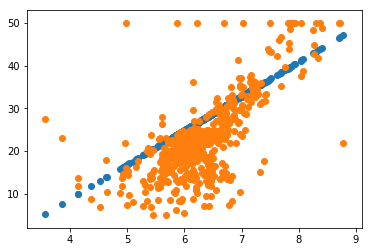

When time is : 0, get best_k: 36.075508802049825 best_b: -92.5865767820651, and the loss is: 111.6020000523984
When time is : 1000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 2000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 3000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 4000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 5000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 6000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 7000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and the loss is: 7.395755055057041
When time is : 8000, get best_k: 18.064051588611065 best_b: -95.41286136704531, and 

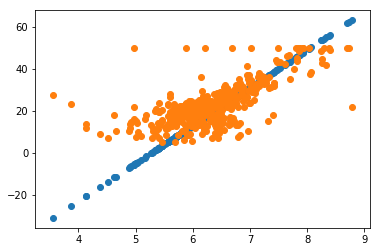

In [61]:
from sklearn.datasets import load_boston
#import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random


def price(rm, k, b):
    return rm*k + b

def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(y)

def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i / abs(y_i - y_hat_i)
    return -1 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) / abs(y_i - y_hat_i)
    return -1 / n * gradient

def gradient_decent():
    data = load_boston()
    trying_times = 10000
    X, y = data['data'], data['target']
    X_rm =X[:,5]
    k_best, b_best = None, None
    loss_min = float('inf') 
    k_current = random.random() * 200 - 100
    b_current = random.random() * 200 - 100
    update_time = 0
    
    for i in range(trying_times):
        price_by_k_and_b = [price(r, k_current, b_current) for r in X_rm]
        loss_current = loss(y, price_by_k_and_b)
        if loss_current < loss_min: # performance became better
            k_best, b_best, loss_min = k_current, b_current, loss_current
        if i % 1000 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, k_best, b_best, loss_min))
        k_gradient = partial_k(X_rm, y, price_by_k_and_b)
        b_gradient = partial_b(X_rm, y, price_by_k_and_b)
        k_current +=  (-1 * k_gradient) * learning_rate
        b_current +=  (-1 * b_gradient) * learning_rate


    plt.scatter(X_rm, [price(rm, k_best, b_best) for rm in X_rm])
    plt.scatter(X_rm, y)
    plt.show()
    
for i in range(10):
    learning_rate = i * 0.05
    gradient_decent()

## $$没看出来是哪里出错了$$

# Part 3: Finish the Solution Parse Part of Edit-Distance

In [112]:


#@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solutions[(string1, string2)] = operation 
    print(candidates)
    print(solutions[(string1, string2)])
    return min_distance

In [113]:
solutions = {}
edit_distance('ABC', 'ABD')

[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(3, 'DEL A'), (1, 'ADD B'), (2, 'SUB A => B')]
ADD B
[(4, 'DEL A'), (2, 'ADD D'), (3, 'SUB A => D')]
ADD D
[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(3, 'DEL A'), (1, 'ADD B'), (2, 'SUB A => B')]
ADD B
[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(1, 'DEL B'), (3, 'ADD A'), (2, 'SUB B => A')]
DEL B
[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(2, 'DEL B'), (2, 'ADD B'), (0, '')]

[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(3, 'DEL A'), (1, 'ADD B'), (2, 'SUB A => B')]
ADD B
[(3, 'DEL B'), (1, 'ADD D'), (2, 'SUB B => D')]
ADD D
[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(3, 'DEL A'), (1, 'ADD B'), (2, 'SUB A => B')]
ADD B
[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(1, 'DEL B'), (3, 'ADD A'), (2, 'SUB B => A')]
DEL B
[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(2, 'DEL B'), (2, 'ADD B'), (0, '')]

[(2, 'DEL A'), (2, 'ADD A'), (0, '')]

[(1, 'DEL B'), (3, 'ADD A'), (2, 'SUB B => A')]
DEL B
[(2, 'DEL C'), (4, 'ADD A'), (3, 'SUB C => A')]
DEL C
[(2, 'DEL A'), (2, 'ADD A'), (0

1

In [114]:
solutions

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABD'): 'ADD D',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABD'): 'ADD D',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABD'): 'SUB C => D'}

In [99]:
candidates

NameError: name 'candidates' is not defined

# Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

# Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

# Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

# Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [ ]:
import random
import matplotlib.pylab as plt

In [ ]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

In [ ]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [ ]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro